In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Demi-Plie'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.502016 0.271066 0.896372 ... 0.497905 0.709778 0.839966]
 [0.502061 0.268482 0.890618 ... 0.497959 0.709911 0.81064 ]
 [0.500166 0.268516 0.903899 ... 0.498042 0.70719  0.806747]
 ...
 [0.499997 0.311957 0.857867 ... 0.495855 0.70155  0.844654]
 [0.499946 0.314676 0.875749 ... 0.495815 0.696237 0.858081]
 [0.499965 0.314577 0.876629 ... 0.495873 0.696059 0.871991]]
Length: 869


869


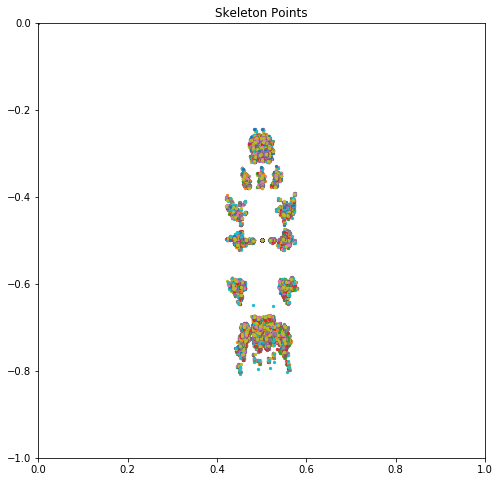

In [4]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

869


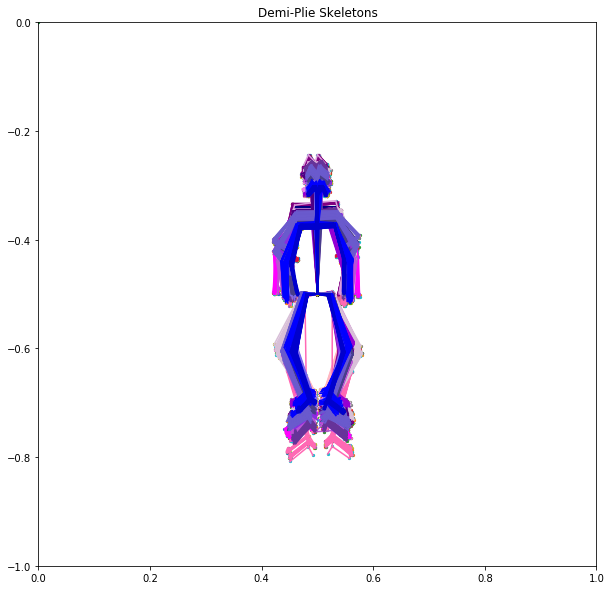

In [5]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Demi-Plie Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [6]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/allDemi-PlieXList.npy', allXList)
np.save('XYCSplitLists/allDemi-PlieYList.npy', allYList)
np.save('XYCSplitLists/allDemi-PlieCList.npy', allCList)

xloaded = np.load('XYCSplitLists/allDemi-PlieXList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/allDemi-PlieYList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/allDemi-PlieCList.npy')
print(xloaded)

[[0.502016 0.49998  0.465264 ... 0.463146 0.465156 0.497905]
 [0.502061 0.499999 0.465291 ... 0.459186 0.463216 0.497959]
 [0.500166 0.498111 0.463367 ... 0.459261 0.463303 0.498042]
 ...
 [0.499997 0.499961 0.471391 ... 0.465291 0.465236 0.495855]
 [0.499946 0.499965 0.471386 ... 0.465262 0.465213 0.495815]
 [0.499965 0.500007 0.471424 ... 0.465362 0.465318 0.495873]]
[[-0.271066 -0.352665 -0.352704 ... -0.726266 -0.723412 -0.709778]
 [-0.268482 -0.350048 -0.347533 ... -0.726255 -0.720878 -0.709911]
 [-0.268516 -0.350068 -0.350085 ... -0.726192 -0.720836 -0.70719 ]
 ...
 [-0.311957 -0.371967 -0.374594 ... -0.717809 -0.71245  -0.70155 ]
 [-0.314676 -0.374584 -0.374648 ... -0.712602 -0.709713 -0.696237]
 [-0.314577 -0.379979 -0.38002  ... -0.715051 -0.70968  -0.696059]]
[[0.502016 0.49998  0.465264 ... 0.463146 0.465156 0.497905]
 [0.502061 0.499999 0.465291 ... 0.459186 0.463216 0.497959]
 [0.500166 0.498111 0.463367 ... 0.459261 0.463303 0.498042]
 ...
 [0.499997 0.499961 0.471391 ...

In [7]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[432.82455299999936, 433.2461669999999, 403.44651900000036, 382.4285780000002, 390.93017799999956, 462.6901670000004, 483.94753999999955, 479.5439439999999, 434.5, 414.4259789999998, 387.8056559999997, 421.8988279999999, 454.64665499999984, 483.4235549999995, 451.76685499999996, 426.22458100000034, 439.1924869999997, 417.62135399999966, 448.1164579999995, 476.3833280000001, 473.88393399999984, 444.63959000000034, 398.67584600000004, 398.93922600000025, 428.56536900000015]
[-250.5282070000001, -311.4227520000003, -311.63141099999996, -376.6238539999999, -429.91192200000035, -310.692348, -374.05480100000017, -428.4922639999998, -434.5, -434.9198509999996, -529.750112, -612.0429249999997, -434.1705930000002, -527.8714259999996, -611.9000900000001, -244.0164820000002, -243.51823900000016, -253.6473219999997, -252.81889900000002, -633.237856, -625.1228970000001, -618.5159879999995, -633.6136080000006, -627.6000830000003, -618.5639419999995]
[788.9414999999996, 787.0812969999993, 761.0389579

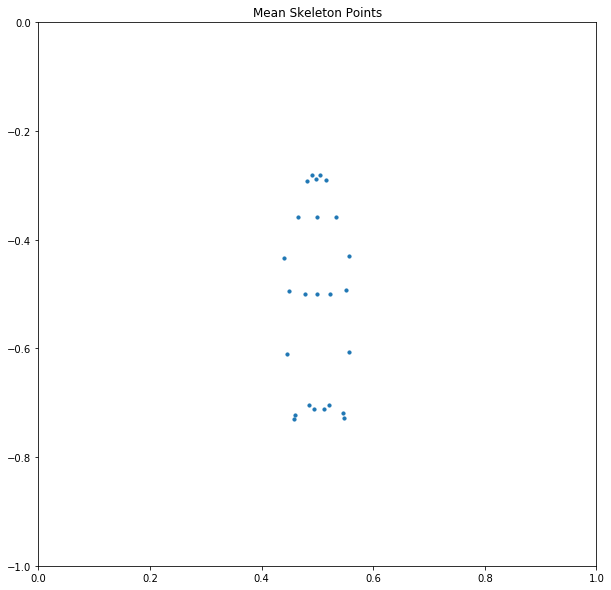

In [8]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [9]:
#calculation of standard deviation values:
import statistics

In [10]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.0029657218428640374, 0.002325175548433623, 0.0037832630566719577, 0.007300388370205951, 0.008109348652758492, 0.0034727868402688435, 0.0072878770187121125, 0.007099980891686338, 0.0, 0.0033663615325625557, 0.007908893126340683, 0.0034968328004113904, 0.003325854210319336, 0.008318011631001723, 0.003685963839172156, 0.004159976770788642, 0.003894392489182316, 0.0032836670729301867, 0.0028797026600566075, 0.007493693340263663, 0.03265225109812565, 0.0033259585027360004, 0.006178477727616774, 0.005370844051991597, 0.003850640776935917]
Standard Deviations of Y values: [0.013991427671658003, 0.009797104341521163, 0.009775293690147537, 0.009756143930900654, 0.017939590207015067, 0.009999813161941581, 0.009561650481784928, 0.019553723858830915, 0.0, 0.0013990890973043743, 0.01078291348404015, 0.01878135680959212, 0.0011973485715668765, 0.010565458382183602, 0.017991570782388132, 0.014595243953134818, 0.014716354810626199, 0.01403131512987586, 0.01407704707

In [11]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [12]:
np.save('Stats/Demi-PlieStdDevX.npy', standardDeviationX)
np.save('Stats/Demi-PlieStdDevY.npy', standardDeviationY)
np.save('Stats/Demi-PlieStdDevC.npy', standardDeviationY)
np.save('Stats/Demi-PlieMeanX.npy', avgXList)
np.save('Stats/Demi-PlieMeanY.npy', avgYList)
np.save('Stats/Demi-PlieMeanC.npy', avgCList)